# Masks

One key feature of `stimupy` is stimulus `"mask"`s.
Just like the `"img"`, the stimulus `"mask"` is a {py:class}`numpy.ndarray` which can be found in the stimulus-{py:class}`dict`.
Each entry of the stimulus `"mask"` corresponds to a pixel in `"img"`
(i.e., it has the same shape as `"img"`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from stimupy.utils import plot_stim, plot_stimuli
from stimupy.components import shapes

Let's create a simple example to understand masks:

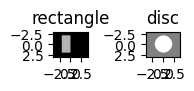

In [2]:
rectangle = shapes.rectangle(visual_size=(6,8), ppd=10,
                        rectangle_size=(4,2), rectangle_position=(1,2),
                        intensity_rectangle=.7)

disc = shapes.disc(visual_size=(6,8), ppd=10,
                        radius=2,
                        intensity_disc=1, intensity_background=.5)

plot_stimuli({"rectangle": rectangle, "disc": disc})
plt.show()

## Basic masks

Importantly, the `"mask"` contains only integer-values
(compared to the floating point pixel-intensities in `"img"`).
Each integer-value in the mask,
corresponds to a geometric region of interest,
e.g. the shape.
For basic shapes like these there are only two such regions:
the background (mask value: `0`), and the shape itself (mask value: `1`).
These can be used to *subset* or *mask* the regions:
all pixels with value `1` belong to the shape.

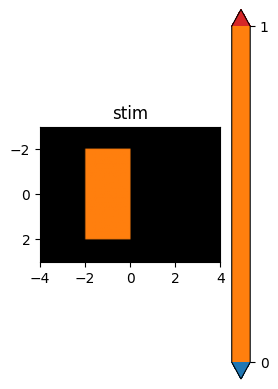

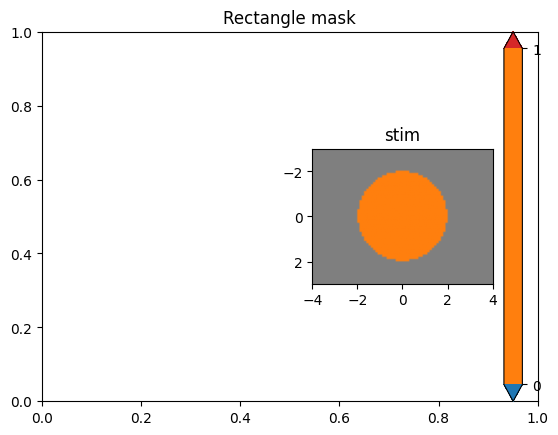

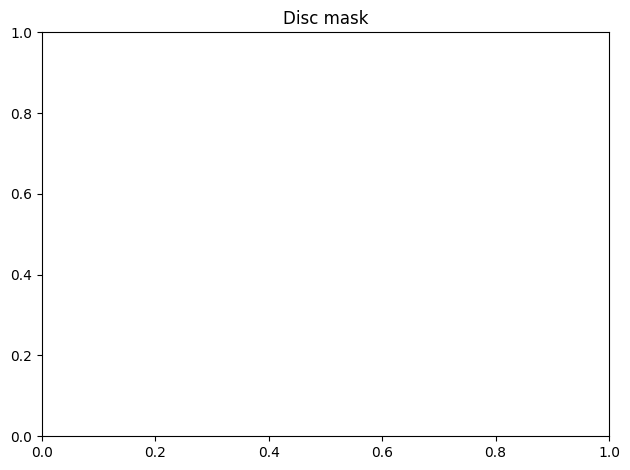

In [3]:
# Display the masks for our shapes
plt.subplot(1,2,1)
plot_stim(rectangle, mask="rectangle_mask")
plt.title("Rectangle mask")
plt.subplot(1,2,2)
plot_stim(disc, mask="ring_mask")
plt.title("Disc mask")
plt.tight_layout()
plt.show()

## Multi-region masks

Masks can also contain multiple regions, each with different integer values.
Let's create a bullseye with multiple rings to demonstrate this:

In [4]:
# Define resolution parameters
visual_size = (10,12)
ppd = 10

# Create center (target) disc:
disc = shapes.disc(visual_size=visual_size, ppd=ppd,
                   radius=2,
                   intensity_disc=.5, intensity_background=.5)

# Create first ring, white:
ring_1 = shapes.ring(visual_size=visual_size, ppd=ppd,
                     radii=(2, 3),
                     intensity_ring=1, intensity_background=.5)

# Create second ring, black:
ring_2 = shapes.ring(visual_size=visual_size, ppd=ppd,
                     radii=(3, 4),
                     intensity_ring=0, intensity_background=.5)

We can combine multiple masks into one that indexes different regions:

In [5]:
# Accumulate mask, starting with disc mask
mask = disc["ring_mask"]

# Add first ring mask
mask = np.where(ring_1["ring_mask"], 2, mask)

# Add second ring mask
mask = np.where(ring_2["ring_mask"], 3, mask)

print("Unique mask values:", np.unique(mask))

Unique mask values: [0 1 2 3]


This gives a mask with 4 unique values which each index pixels belonging to different areas:
- `1` for the central disc
- `2` for the first ring around that
- `3` for the outer ring
- `0` for the background, i.e., everywhere else

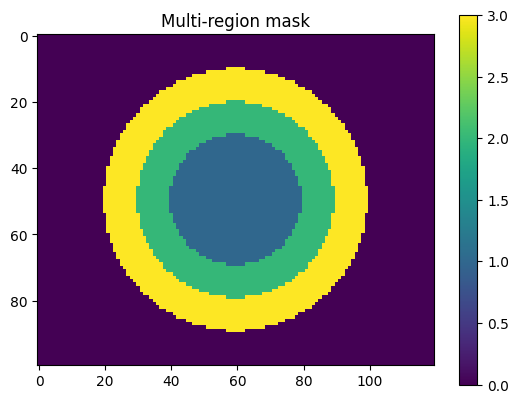

In [6]:
plt.imshow(mask)
plt.colorbar()
plt.title("Multi-region mask")
plt.show()

## Using masks to manipulate stimuli

One advantage of having these kinds of `"mask"`s that index regions
(rather than just binary masks)
is that we can use the `"mask"` to selectively alter one region in an existing stimulus
without having to recreate the whole image:

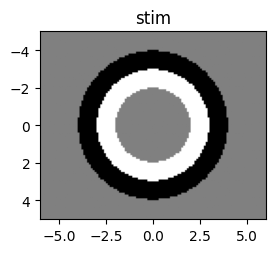

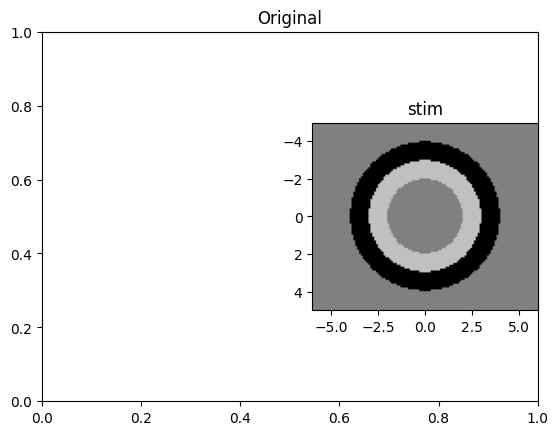

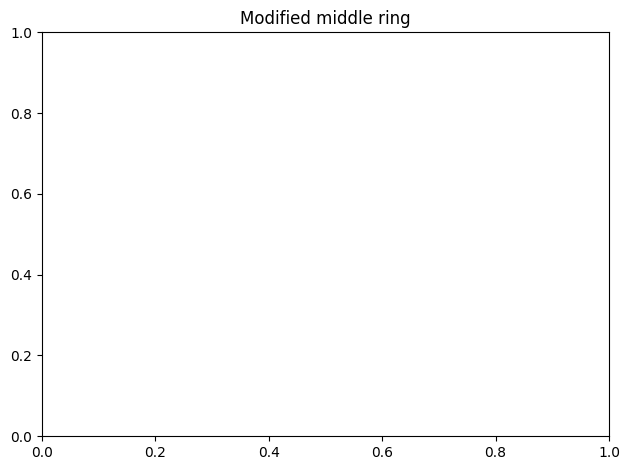

In [7]:
# Create image using the mask
img = np.where(mask==1, 0.5, 0.5)  # Central disc
img = np.where(mask==2, 1, img)    # First ring
img = np.where(mask==3, 0, img)    # Second ring

bullseye = {
    "img": img,
    "mask": mask,
    "visual_size": visual_size,
    "ppd": ppd
}

plt.subplot(1,2,1)
plot_stim(bullseye)
plt.title("Original")

# Change intensity of middle ring to .75; leave rest of image as is:
bullseye["img"] = np.where(bullseye["mask"]==2, .75, bullseye["img"])

plt.subplot(1,2,2)
plot_stim(bullseye)
plt.title("Modified middle ring")
plt.tight_layout()
plt.show()

## Visualizing masks

We can easily visualize masks overlaid as color coding on top of the stimulus:

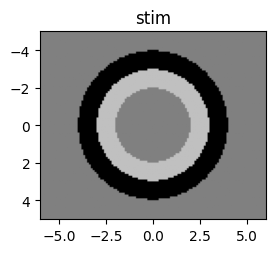

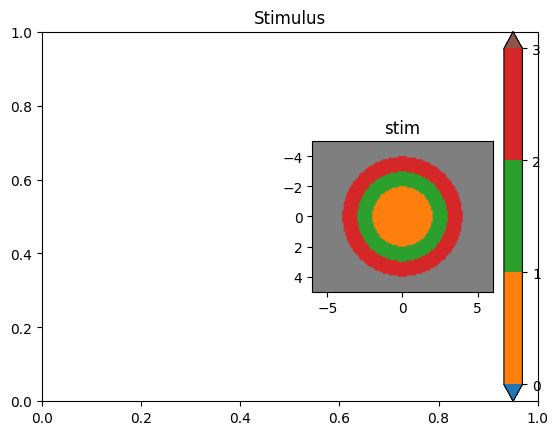

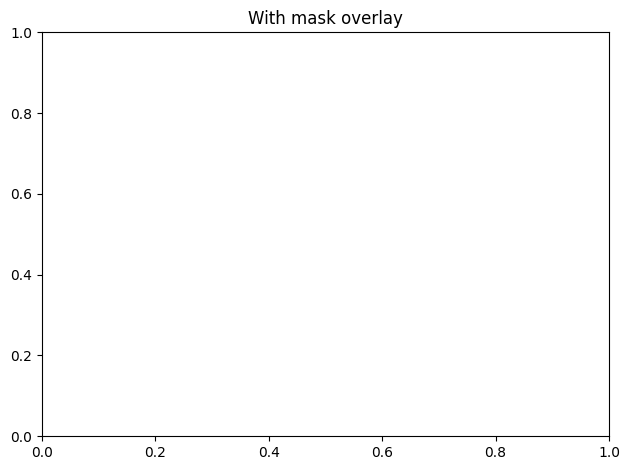

In [8]:
plt.subplot(1,2,1)
plot_stim(bullseye)
plt.title("Stimulus")
plt.subplot(1,2,2)
plot_stim(bullseye, mask="mask")
plt.title("With mask overlay")
plt.tight_layout()
plt.show()

## Logical operations on masks

Masks can be combined using logical operations. For example, we can create masks for overlapping regions:

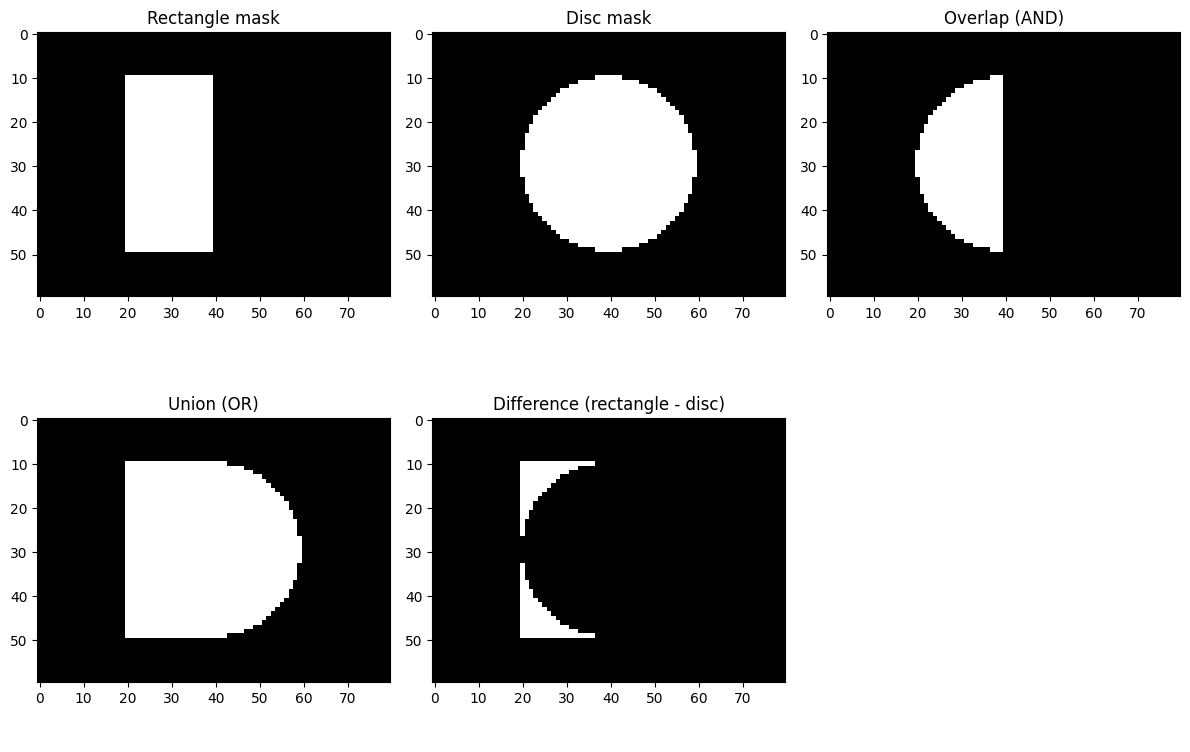

In [9]:
# Create overlapping shapes
rectangle = shapes.rectangle(visual_size=(6,8), ppd=10,
                        rectangle_size=(4,2), rectangle_position=(1,2),
                        intensity_rectangle=.7)

disc = shapes.disc(visual_size=(6,8), ppd=10,
                        radius=2,
                        intensity_disc=1, intensity_background=.5)

# Logical operations on masks
overlap_mask = (rectangle["rectangle_mask"] == 1) & (disc["ring_mask"] == 1)
union_mask = (rectangle["rectangle_mask"] == 1) | (disc["ring_mask"] == 1)
difference_mask = (rectangle["rectangle_mask"] == 1) & (~(disc["ring_mask"] == 1))

# Visualize the different logical operations
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0,0].imshow(rectangle["rectangle_mask"], cmap="gray")
axes[0,0].set_title("Rectangle mask")
axes[0,1].imshow(disc["ring_mask"], cmap="gray")
axes[0,1].set_title("Disc mask")
axes[0,2].imshow(overlap_mask, cmap="gray")
axes[0,2].set_title("Overlap (AND)")

axes[1,0].imshow(union_mask, cmap="gray")
axes[1,0].set_title("Union (OR)")
axes[1,1].imshow(difference_mask, cmap="gray")
axes[1,1].set_title("Difference (rectangle - disc)")
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

```{margin}
{py:func}`numpy.where` is a function to create a {py:class}`numpy.ndarray`,
based on some predicate-array.
For each array entry in the predicate (here: a mask),
if it is "truth-y" (`True`, or nonzero)
fill in one value;
and if the predicate is false, fill in another value.
```

Masks are fundamental to how `stimupy` works and enable precise control over different regions of stimuli, making it easy to create complex visual patterns and manipulate them after creation.